# 1) Verinin Toplanması

In [ ]:
# Data analysis packages.
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 
import numpy as np 
# Data Visualizations
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
path = "/content/Datathon_Plant_X.xlsx - Train-Test (1).csv"
df = pd.read_csv(path, sep = ",", index_col = "Unnamed: 0", parse_dates = True )

# 2) Veri Ön İşleme Ve Temizleme

Bu aşamada veri setindeki değişkenleri incelemek adına birtakım methodlar kullanılmıştır. Gözlemlenen değerlere göre gerekli işlemler uygulanarak veri seti kullanılmaya hazır duruma getirilmiştir.

In [ ]:
df

,Y1,Y2,E1,E2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D
2014-05-15 00:00,3.200980,9.658993,NaN,NaN,4448.771308,33.471559,14.767730,19.796307,15.725165,752.452933,6587.005853,2.6433,10768.178760,NaN
2014-05-15 01:00,3.615716,9.302299,NaN,NaN,4442.398566,33.421821,14.845213,19.950811,16.305541,752.461803,6588.156991,2.6433,9895.346884,NaN
2014-05-15 02:00,3.748671,9.526543,NaN,NaN,4447.961145,33.784009,15.387849,20.214004,17.253103,752.328113,6586.293877,0.8811,9039.178904,NaN
2014-05-15 03:00,3.828601,9.540441,NaN,NaN,4446.466744,31.479599,14.830375,20.323768,17.994465,751.932141,6585.942271,0.8811,11391.700930,NaN
2014-05-15 04:00,3.880042,9.704919,NaN,NaN,4454.121402,34.578727,16.221921,20.945486,18.570945,751.422418,6586.498556,1.7622,10656.509980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-10 19:00,1.976544,6.697626,NaN,NaN,2563.287817,35.544579,14.481334,18.935589,10.669211,748.180470,6587.403490,1.7622,12647.624520,NaN
2015-08-10 20:00,1.919721,6.464204,NaN,NaN,2761.998423,35.864292,14.458736,18.933983,10.660709,747.677843,6583.605560,2.6433,11157.058710,NaN
2015-08-10 21:00,1.815692,6.621369,NaN,NaN,2760.874179,36.289934,14.473352,18.989011,10.801782,747.278400,6585.089632,3.5244,11469.463510,NaN
2015-08-10 22:00,1.780213,6.581165,NaN,NaN,2760.699266,35.446168,14.390036,19.017193,10.815140,746.952955,6587.626578,2.6433,8704.929229,NaN


In [ ]:
df.shape

(10897, 14)

In [ ]:
df.dtypes

Y1    float64
Y2    float64
E1    float64
E2    float64
A1    float64
Y3    float64
Y4    float64
Y5    float64
Y6    float64
U1    float64
U2    float64
O1    float64
O2    float64
D     float64
dtype: object

In [ ]:
df.index.isnull().sum()

0

In [ ]:
df.isnull().sum()

Y1        1
Y2        1
E1    10834
E2    10833
A1        1
Y3        1
Y4        1
Y5        1
Y6        1
U1        1
U2        1
O1        0
O2        0
D     10459
dtype: int64

Yukarıda verilen çıktı incelendiğinde, "E1", "E2" ve "D" değişkenlerinin büyük bir çoğunluğunun NaN değerlerden oluştuğu gözlemleniyor. Veri setine dikkatle bakıldığında, bu durumun sebebi olarak bu değerlerin belirli periyotlarla ölçüldüğü görülüyor. 
Aşağıda bu değişkenler üzerinde daha detaylı incelemeler yapılmıştır.

## 2a) Özellik Mühendisliği (Feature Engineering)

### E1 ve E2 Değişkenleri Hakkında

##### E1: Element_1 Laboratuvar Ölçümü
##### E2: Element_2 Laboratuvar Ölçümü

In [ ]:
df[["E1","E2"]].dropna()

,E1,E2
2014-05-21 22:00,0.801,0.6408
2014-05-28 22:00,0.712,0.9790
2014-06-04 22:00,0.979,1.3884
2014-06-11 22:00,0.890,0.5340
2014-06-18 22:00,0.979,0.7120
...,...,...
2015-07-07 22:00,9.790,9.2560
2015-07-14 22:00,0.890,0.0979
2015-07-21 22:00,1.513,10.6800
2015-07-28 22:00,0.890,0.3115


E1 ve E2 değişkenlerinden eksik gözlemler düşürüldüğü zaman, verilen tarihlere bakıldığında her ölçümün 7 günlük aralıklarla yapıldığı gözlemleniyor. İstatistiksel olarak bakıldığında, zaman serisi hakkında bilgi sahibi olan bir kişinin, buradaki periyodun 7 olduğunu söyleyebileceği açıkça görülüyor.

## D Değişkeni

#### Dönüşüm Oranı Hakkında

In [ ]:
df[["D"]].dropna()

,D
2014-05-20 12:00,56.434247
2014-05-21 12:00,54.243913
2014-05-22 12:00,51.388007
2014-05-23 12:00,54.235757
2014-05-24 12:00,49.597396
...,...
2015-08-06 12:00,44.481523
2015-08-07 12:00,43.148892
2015-08-08 12:00,39.720295
2015-08-09 12:00,40.379224


Dönüşüm oranı değişkenine bakıldığında ise, periyodun 1 günlük aralıklarla ölçüldüğü görülebilir.

Veri setinin orijinalini bozmamak adına, aşağıda başka bir değişkene atama yapılıyor.

In [ ]:
df_merge = round(df.copy(),3)
df_merge.head()

,Y1,Y2,E1,E2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D
2014-05-15 00:00,3.201,9.659,NaN,NaN,4448.771,33.472,14.768,19.796,15.725,752.453,6587.006,2.643,10768.179,NaN
2014-05-15 01:00,3.616,9.302,NaN,NaN,4442.399,33.422,14.845,19.951,16.306,752.462,6588.157,2.643,9895.347,NaN
2014-05-15 02:00,3.749,9.527,NaN,NaN,4447.961,33.784,15.388,20.214,17.253,752.328,6586.294,0.881,9039.179,NaN
2014-05-15 03:00,3.829,9.540,NaN,NaN,4446.467,31.480,14.830,20.324,17.994,751.932,6585.942,0.881,11391.701,NaN
2014-05-15 04:00,3.880,9.705,NaN,NaN,4454.121,34.579,16.222,20.945,18.571,751.422,6586.499,1.762,10656.510,NaN


# 3) Veri Analizi 

## 3a) Değişkenler Arasındaki İlişkiler

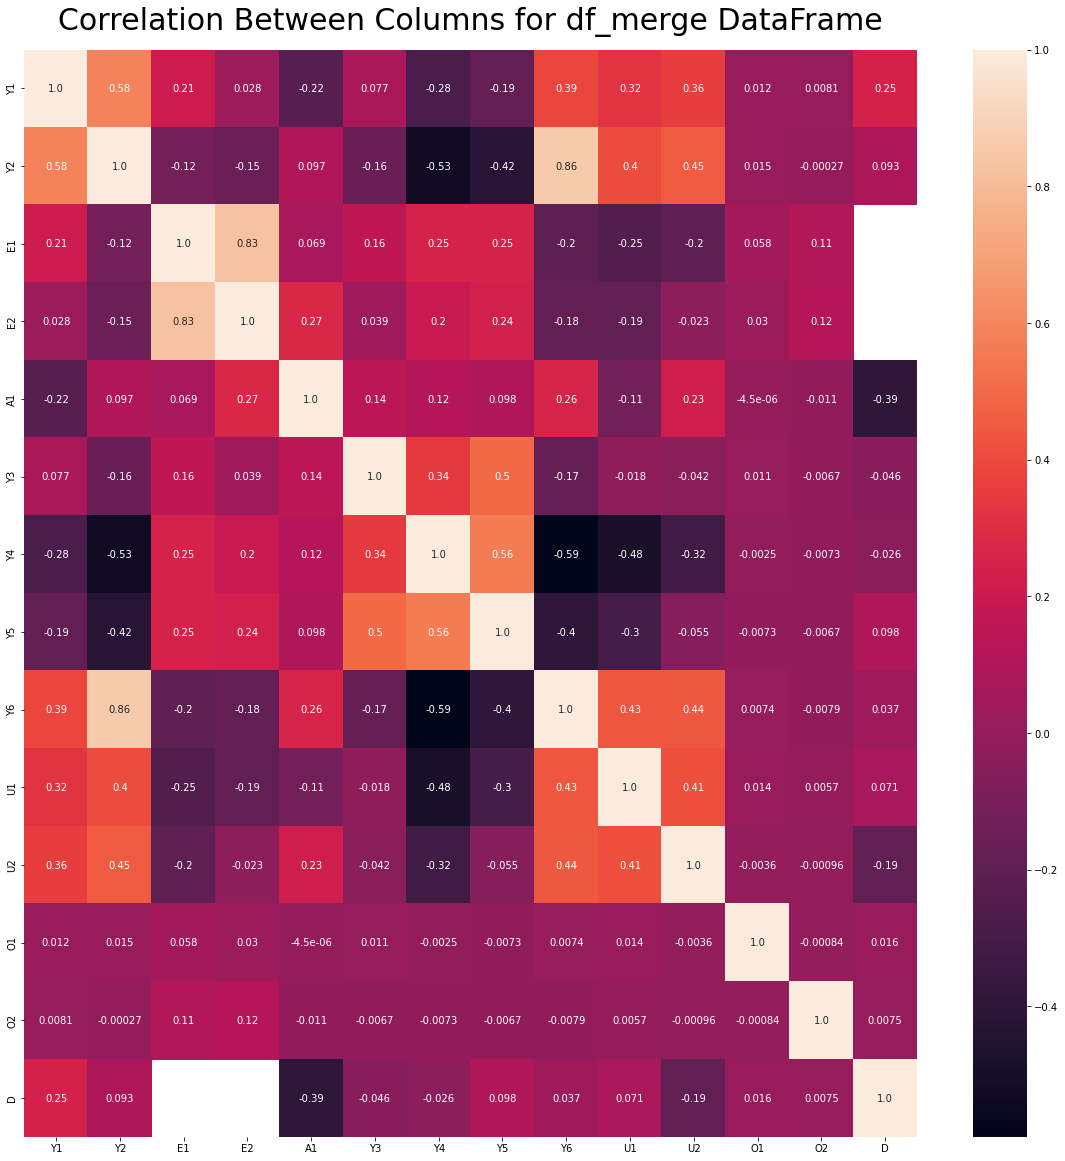

In [ ]:
plt.figure(figsize = (20,20))
corrMap = sns.heatmap(df_merge.corr(), annot=True, fmt = '0.2')
corrMap.set_title('Correlation Between Columns for df_merge DataFrame', fontdict={'fontsize':30}, pad=20);

Özelliklerin birbiri ile ne kadar ilişkili olduğu hakkında bir cevap olması adına, koralasyon değerleri ısı haritası formatında sunulmuştur. Sonuçlara bakılarak 2. Bölge Sıcaklık Proses değerleri ile 6. Bölge Sıcaklık Proses değerleri arasında bir ilişki olduğu görülmüştür. Aşağıda, bu ilişkinin daha net gözlemlenebilmesi adına bir grafik oluşturulmuştur.

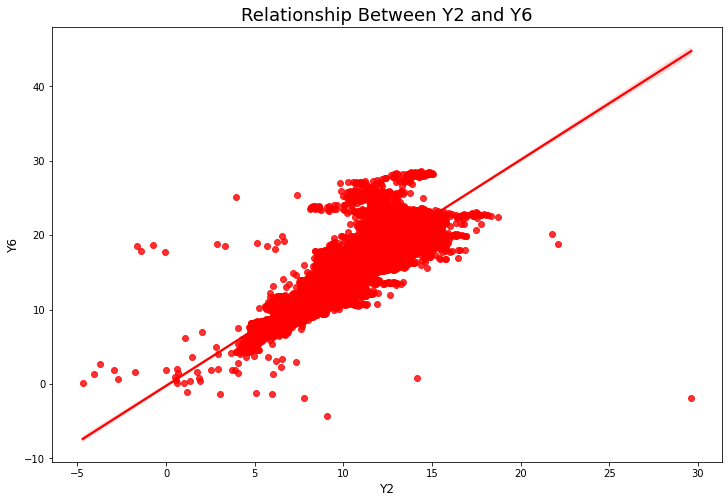

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x=df_merge["Y2"], y=df_merge["Y6"], color='red')
plt.title("Relationship Between Y2 and Y6", size=18)
plt.xlabel("Y2", size=12)
plt.ylabel("Y6", size=12)
plt.show()

In [ ]:
idx = df_merge.loc["2015-02-29 00:00":"2015-02-29 23:00",:].index
df_merge.drop(idx, inplace=True)

Mevcut veri seti içerisinde bulunan "2015-02-29 00:00 - 2015-02-29 23:00" tarih aralığı 2015 yılı için gerçekliği yansıtmadığından (2015 artık yıl değildir) kullanılmak istenen method hata vermektedir. Bu yüzden verilen  tarih aralığı veri setinden kaldırıldı.

## 3b) Veri Setindeki Zaman Değişkeninin Düzenlenmesi

In [ ]:
df_merge.index = pd.to_datetime(df_merge.index)

In [ ]:
df_merge

,Y1,Y2,E1,E2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D
2014-05-15 00:00:00,3.201,9.659,NaN,NaN,4448.771,33.472,14.768,19.796,15.725,752.453,6587.006,2.643,10768.179,NaN
2014-05-15 01:00:00,3.616,9.302,NaN,NaN,4442.399,33.422,14.845,19.951,16.306,752.462,6588.157,2.643,9895.347,NaN
2014-05-15 02:00:00,3.749,9.527,NaN,NaN,4447.961,33.784,15.388,20.214,17.253,752.328,6586.294,0.881,9039.179,NaN
2014-05-15 03:00:00,3.829,9.540,NaN,NaN,4446.467,31.480,14.830,20.324,17.994,751.932,6585.942,0.881,11391.701,NaN
2014-05-15 04:00:00,3.880,9.705,NaN,NaN,4454.121,34.579,16.222,20.945,18.571,751.422,6586.499,1.762,10656.510,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-10 19:00:00,1.977,6.698,NaN,NaN,2563.288,35.545,14.481,18.936,10.669,748.180,6587.403,1.762,12647.625,NaN
2015-08-10 20:00:00,1.920,6.464,NaN,NaN,2761.998,35.864,14.459,18.934,10.661,747.678,6583.606,2.643,11157.059,NaN
2015-08-10 21:00:00,1.816,6.621,NaN,NaN,2760.874,36.290,14.473,18.989,10.802,747.278,6585.090,3.524,11469.464,NaN
2015-08-10 22:00:00,1.780,6.581,NaN,NaN,2760.699,35.446,14.390,19.017,10.815,746.953,6587.627,2.643,8704.929,NaN


Aşağıda, daha önce elde edilen periyotlara uygun olarak farklı "data frame"ler oluşturulmuştur.

In [ ]:
gunluk_df = df_merge.loc[:,["D"]] 
haftalik_df = df_merge.loc[:,["E1","E2"]]
saatlik_df = df_merge.iloc[:,[0,1,4,5,6,7,8,9,10,11,12]]

Oluşturulan "data frame"ler incelendiğinde, eksik gözleme sahip değerlerin en fazla "Saatlik_dF"de olduğu görülüyor. Bu sebeple saatlik periyottaki verileri günlük periyottaki verilere çevirmek istenmektedir. Daha sonra, uygulanan bu işlem haftalık periyoda dönüştürülecektir.

Aşağıda verilen aşamada; saatlik, günlük ve haftalık periyoda sahip  olan veri setleri ayrı ayrı ele alınarak eksik gözlemler doldurulmuştur. 


## 3c) Kayıp Verilerin Doldurulması

In [ ]:
saatlik_df.isnull().sum()

Y1    1
Y2    1
A1    1
Y3    1
Y4    1
Y5    1
Y6    1
U1    1
U2    1
O1    0
O2    0
dtype: int64

Bilinen 2 değer arasındaki, herhangi bir bilinmeyen değeri bulma yöntemine interpolasyon denmektedir. Aşağıda, eksik verileri doldurma işlemi adına interpolasyon yönteminden faydalanılmıştır. Bu yöntem ile eksik gözlem olmayan iki değer üzerinden eksik gözlemlerin doldurulması hedeflenmektedir.

In [ ]:
saatlik_df = saatlik_df.interpolate()
saatlik_df.isnull().sum()

Y1    0
Y2    0
A1    0
Y3    0
Y4    0
Y5    0
Y6    0
U1    0
U2    0
O1    0
O2    0
dtype: int64

dataframe.bfill() methodu veri seti geriye doğru incelendiğinde eksik olmayan ilk değer ile eksik olan değerleri doldurma işlemi yapmaktadır. Aşağıda  verilen "dataframe"de eksik gözlemler bu method yardımı ile doldurulmuştur.

In [ ]:
gunluk_df = gunluk_df.resample(rule = "D").mean().bfill(axis ='rows')
print(f"D Değişkeni Boyut:{gunluk_df.shape}\n\nİlk 5 Gözlem {gunluk_df.head()}")
gunluk_df.isnull().sum()

D Değişkeni Boyut:(453, 1)

İlk 5 Gözlem                  D
2014-05-15  56.434
2014-05-16  56.434
2014-05-17  56.434
2014-05-18  56.434
2014-05-19  56.434


D    0
dtype: int64

In [ ]:
haftalik_df = haftalik_df.resample(rule = "W").mean().pad()
print(f"E1 ve E2 Değişkeni Boyut:{haftalik_df.shape}\n\nİlk 5 Gözlem {haftalik_df.head()}")
haftalik_df.isnull().sum()

E1 ve E2 Değişkeni Boyut:(66, 2)

İlk 5 Gözlem                E1      E2
2014-05-18    NaN     NaN
2014-05-25  0.801  0.7875
2014-06-01  0.712  0.9790
2014-06-08  0.979  1.3880
2014-06-15  0.890  0.5340


E1    1
E2    1
dtype: int64

In [ ]:
saatlik_df = saatlik_df.asfreq(freq="D")
print(f"Saatlik Veri Seti Değişkeni Boyut:{saatlik_df.shape}\n\nİlk 5 Gözlem {saatlik_df.head()}")

Saatlik Veri Seti Değişkeni Boyut:(453, 11)

İlk 5 Gözlem                Y1      Y2        A1      Y3      Y4      Y5      Y6       U1  \
2014-05-15  3.201   9.659  4448.771  33.472  14.768  19.796  15.725  752.453   
2014-05-16  3.642  10.674  4453.972  34.040  16.507  23.925  26.191  748.021   
2014-05-17  3.627  13.118  3554.028  33.927  15.603  26.363  27.236  746.952   
2014-05-18  3.334  14.056  3558.698  33.674  15.191  24.203  28.464  746.987   
2014-05-19  3.483  13.589  3560.557  33.211  14.238  22.622  28.277  747.574   

                  U2     O1         O2  
2014-05-15  6587.006  2.643  10768.179  
2014-05-16  6581.751  1.762  11980.900  
2014-05-17  6582.724  2.643  11761.060  
2014-05-18  6585.052  1.762  11698.976  
2014-05-19  6598.943  4.406  11343.999  


Eksik verilerden arındırılan "saatlik_df" ve "gunluk_df" aşağıda birleştirilmiştir.

In [ ]:
df_merge = pd.merge(saatlik_df, gunluk_df, left_index=True, right_index=True)
df_merge.head()

,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D
2014-05-15,3.201,9.659,4448.771,33.472,14.768,19.796,15.725,752.453,6587.006,2.643,10768.179,56.434
2014-05-16,3.642,10.674,4453.972,34.040,16.507,23.925,26.191,748.021,6581.751,1.762,11980.900,56.434
2014-05-17,3.627,13.118,3554.028,33.927,15.603,26.363,27.236,746.952,6582.724,2.643,11761.060,56.434
2014-05-18,3.334,14.056,3558.698,33.674,15.191,24.203,28.464,746.987,6585.052,1.762,11698.976,56.434
2014-05-19,3.483,13.589,3560.557,33.211,14.238,22.622,28.277,747.574,6598.943,4.406,11343.999,56.434


Aşağıda, "Haftalik_dF" veri seti iki farklı yöntem uygulanarak doldurulmuştur. İki farklı yöntem kullanılmasının sebebi oluşturulacak olan modelde hangi "dataframe"den daha yüksek verimliliğin elde edileceğinin gözlemlenmek istenmesidir. "ffill" ve "bfill" methodu istenen duruma uygun olacak şekilde kullanılmıştır.

In [ ]:
haftalik_gunluk_ffill = haftalik_df.asfreq(freq = "D", method="ffill")
haftalik_gunluk_ffill = haftalik_gunluk_ffill.bfill()
haftalik_gunluk_ffill.isnull().sum()

E1    0
E2    0
dtype: int64

In [ ]:
haftalik_gunluk_ffill.shape

(456, 2)

In [ ]:
merged_ffill = pd.merge(df_merge, haftalik_gunluk_ffill, left_index=True, right_index=True)
print(f"Merge Ffill Veri Seti Boyut:{merged_ffill.shape}")

Merge Ffill Veri Seti Boyut:(450, 14)


## 3d) Gereksiz Özelliklerin Tespiti

Ortak Bilgi (Mutual Information) değerleri her bir sütun için incelenmiştir. Bu inceleme sonucunda elde edilen grafikten hangi özelliklerin "redundant" olduğu gözlemlenmiştir.

Bir özelliğin MI değerinin düşüklüğü, o özelliğin veri seti içerisinde ne kadar gereksiz olduğunu açıklar. 


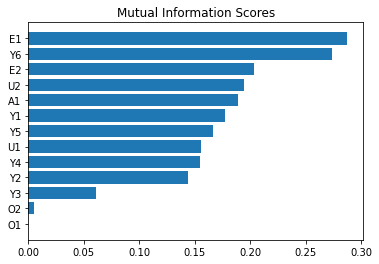

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    

    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

X = merged_ffill.copy()
y = X.pop("D")

mi_scores = make_mi_scores(X, y)
plot_mi_scores(mi_scores)

Yukarıda oluşturulan "MI score" değerine bakıldığında; "O1", "O2" ve "Y3" değerlerinin, diğer özelliklere göre oldukça az olduğu görülmektedir. İleride yapılacak olan "Eğitim - Test" sürecinde bu özellikler göz ardı edilecektir.

## 3e) Zaman Serilerinin Gözlemlenmesi Adına Oluşturulan Eğitim - Test Setleri

In [ ]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(data, train_percent, validation_percent, test_percent):
    
    if (train_percent + validation_percent + test_percent != 100):
        print("ERROR: Sum of percents must be 100")
        return
    
    train_ratio = train_percent / 100
    temp_ratio = 1 - train_ratio
    validation_ratio = validation_percent / (validation_percent + test_percent)
    test_ratio = 1 - validation_ratio
    
    splitted_data = dict()

    splitted_data["train"], temp_data = train_test_split(data, train_size=train_ratio, test_size=temp_ratio)
    splitted_data["validation"], splitted_data["test"] = train_test_split(temp_data,  train_size=validation_ratio, test_size=test_ratio)

    return splitted_data

In [ ]:
splitted_X = train_validation_test_split(X, 60, 20, 20)
X_train = splitted_X["train"]
X_validation = splitted_X["validation"]
X_test = splitted_X["test"]

splitted_y = train_validation_test_split(y, 60, 20, 20)
y_train = pd.DataFrame(splitted_y["train"], columns=["D"])
y_validation = pd.DataFrame(splitted_y["validation"], columns=["D"])
y_test = pd.DataFrame(splitted_y["test"], columns=["D"])

X_train.head()

,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,E1,E2
2015-04-14,2.485,5.286,2679.607,37.216,19.808,24.076,6.452,743.744,3917.467,0.881,11819.990,0.801,1.317
2015-05-16,8.530,10.238,2773.626,38.353,16.035,19.615,15.144,746.674,6405.438,1.762,9707.149,4.272,8.286
2014-07-23,4.513,14.090,2941.922,32.394,12.159,18.060,20.574,747.242,6587.052,1.762,11603.900,1.513,1.531
2014-10-28,5.608,11.675,2662.715,36.122,12.258,18.196,17.229,749.992,6608.116,0.881,12173.369,3.916,7.031
2015-06-06,3.934,7.547,3511.424,38.070,19.592,26.280,10.543,745.085,6407.172,0.881,11168.447,2.492,3.204


In [ ]:
def scale(X, y=None):
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    tmpColumns = X.columns
    tmpIndexes = X.index
    if type(y) != None:
        X = scaler.fit_transform(X, y)
    else:
        X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns=tmpColumns)
    X.index = tmpIndexes
    
    return X

X_train = scale(X_train, y=y_train)
X_validation = scale(X_validation, y=y_validation)
X_test = scale(X_train, y=y_test)

Veri setindeki değişkenler uygun olacak şekilde "train", "validation" ve "test" setlerine ayrılmış, daha sonra da scale edilerek uygulanacak işlemlere uyumlu hale getirilmiştir.

In [ ]:
X_train.drop(["O1", "O2", "Y3"], axis=1, inplace=True)
X_validation.drop(["O1", "O2", "Y3"], axis=1, inplace=True)
X_test.drop(["O1", "O2", "Y3"], axis=1, inplace=True)

## 3f) Eğitim  Veri Seti - Test Veri Seti

Eğitim Veri Seti'ne uygulanan tüm işlemler Test Veri Seti için de gerçekleştirilecektir.

In [ ]:
X_pred = pd.read_csv("/content/Datathon_Plant_X.xlsx - Predict.csv",sep = ",")
print(f"Test Veri Seti Boyutu:{X_pred.shape}\nTest Veri Seti Değişkenler:{X_pred.columns}")

Test Veri Seti Boyutu:(937, 14)
Test Veri Seti Değişkenler:Index(['Unnamed: 0', 'Y1', 'Y2', 'E1', 'E2', 'A1', 'Y3', 'Y4', 'Y5', 'Y6',
       'U1', 'U2', 'O1', 'O2'],
      dtype='object')


In [ ]:
X_pred.dtypes

Unnamed: 0     object
Y1            float64
Y2            float64
E1            float64
E2            float64
A1            float64
Y3            float64
Y4            float64
Y5            float64
Y6            float64
U1            float64
U2            float64
O1            float64
O2            float64
dtype: object

In [ ]:
idx = X_pred.loc["2015-02-29 00:00":"2015-02-29 23:00",:].index
X_pred.drop(idx, inplace=True)

In [ ]:
X_pred["Unnamed: 0"] = pd.to_datetime(X_pred["Unnamed: 0"])
X_pred.set_index("Unnamed: 0", inplace=True)

In [ ]:
haftalik_df = X_pred.loc[:,["E1","E2"]]
saatlik_df = X_pred.iloc[:,[0,1,4,5,6,7,8,9,10,11,12]]

Aşağıda "Saatlik_dF" ve "Haftalık_dF" periyotları gün olacak şekilde düzenlenmiştir.

In [ ]:
saatlik_df = saatlik_df.asfreq(freq="D")
print(f"Saatlik Veri Seti Değişkeni Boyut:{saatlik_df.shape}\n\nİlk 5 Gözlem {saatlik_df.head()}")

Saatlik Veri Seti Değişkeni Boyut:(39, 11)

İlk 5 Gözlem                   Y1        Y2           A1         Y3         Y4         Y5  \
Unnamed: 0                                                                     
2015-08-11  1.721461  6.287297  2792.770873  36.770580  14.371267  18.866796   
2015-08-12  1.970798  6.525396  2579.770835  37.203594  14.928315  20.026038   
2015-08-13  3.346321  8.527080  2316.756236  37.064890  15.128439  20.614906   
2015-08-14  4.830639  8.978154  2310.161913  37.392409  15.188359  20.761225   
2015-08-15  5.444950  8.894254  2313.648635  35.762440  15.264318  20.690782   

                   Y6          U1           U2      O1           O2  
Unnamed: 0                                                           
2015-08-11  10.726615  746.846147  6586.386898  0.8811  10439.73646  
2015-08-12  10.288027  746.530842  6589.553038  0.8811  12511.55530  
2015-08-13  10.323132  746.777716  6587.759834  0.0000  10925.65301  
2015-08-14  10.741655  747.53541

In [ ]:
haftalik_gunluk = haftalik_df.resample(rule="D").mean().bfill()
print(f"Haftalık Veri Seti Değişkeni Boyut:{haftalik_gunluk.shape}\n\nİlk 5 Gözlem {haftalik_gunluk.head()}")

Haftalık Veri Seti Değişkeni Boyut:(39, 2)

İlk 5 Gözlem                E1      E2
Unnamed: 0               
2015-08-11  0.000  2.2250
2015-08-12  1.246  2.7857
2015-08-13  1.246  2.7857
2015-08-14  1.246  2.7857
2015-08-15  1.246  2.7857


In [ ]:
X_pred = pd.merge(saatlik_df, haftalik_gunluk, left_index=True, right_index=True)

In [ ]:
X_pred.drop(["O1", "O2", "Y3"], axis=1, inplace=True)
X_pred = scale(X_pred)

X_pred.shape

(39, 10)

## 3g) Aykırı Değer Analizi 

Veri seti üzerinde analiz işlemleri gerçekleştirilirken, aykırı gözlem analizininin de ihmal edilmemesi gerekmektedir. Aykırı değerler istatistiksel olarak gerekli koşul varsayımının bozulmasında önemli rol oynamaktadır. Bu analizinn gözden kaçırılması sonucu oluşacak yanlılık, yanlış analiz sonucuna sebep olur. Uçlarda kalan tek bir değer bile dağılımın yönünü değiştirmektedir.

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Y1,270.0,4.266135e-16,1.001857,-3.110818,-0.554307,-0.110528,0.415180,3.842864
Y2,270.0,-1.776357e-16,1.001857,-2.060598,-0.690686,-0.063732,0.706910,2.142726
A1,270.0,-1.417385e-15,1.001857,-1.765670,-0.768234,-0.253108,0.335001,4.267067
Y4,270.0,-9.046262e-17,1.001857,-4.346370,-0.634428,0.050999,0.616327,2.500940
Y5,270.0,-1.293615e-15,1.001857,-2.558791,-0.741836,0.052093,0.831401,1.961147
Y6,270.0,4.046146e-16,1.001857,-2.551484,-0.808572,-0.008582,0.727679,2.959694
U1,270.0,6.163794e-16,1.001857,-3.176870,-0.392609,0.196606,0.664401,2.796304
U2,270.0,-1.255374e-15,1.001857,-4.238889,0.150524,0.205205,0.507160,0.725542
E1,270.0,5.880070e-17,1.001857,-0.581260,-0.469336,-0.379796,-0.088793,5.552188
E2,270.0,-2.826957e-17,1.001857,-0.406984,-0.304374,-0.251694,-0.103808,6.863125


In [ ]:
X_train.skew(axis=0)

Y1    0.880462
Y2    0.136900
A1    1.353709
Y4   -1.459168
Y5   -0.173592
Y6    0.100179
U1   -0.835068
U2   -3.137193
E1    3.666949
E2    6.074666
dtype: float64

Ortalama ve ortanca arasındaki ilişkiden, veri setinde bulunan değişkenlerin dağılımı hakkında bilgi sahibi olunabilir. Bazı koşullarda çarpıklık değerlerinin, +/- .5 aralığında olması  verilerin normal dağılıma uyduğu anlamına gelir. Çarpıklık değerlerinin verilen aralığın dışında olması, dağılımın çarpık olduğu ve dağılım hangi yöne doğru ise, gözlemlerin o yönde yoğun olarak biriktiği hakkında bilgi vermektedir. Bahsedilen ifadeden aykırı gözlemlerin bulunabiliceği sonucu çıkarılmaktadır. 

Değişkenlerin dağılımı hakkında, histogram grafiğini çizilerek bilgi sahibi olunmalıdır. Aykırı değerler hakkında ise, box plot grafikleri çizilerek bilgi sahibi olunabilir.


Normallik varsayımları, bazı analizlerin gerçekleştirilmesinde ön koşul olarak aranmaktadır. 

In [ ]:
kws_kde = {"color":'r', "lw" : 5,"label" : "kde"}

kws_hist = {"histtype":"stepfilled", "linewidth" : 3,"alpha": 1, "color":"y" }

sns.set_theme(style="darkgrid", palette="pastel")

In [ ]:
def quick_plot(df = None, col = None, labeled = None):
    hists, ax = plt.subplots(sharey=True, tight_layout=True)
    ax = sns.distplot(df[col], kde=True, kde_kws=kws_kde,
    axlabel="{}".format(labeled))
    ax.set_title(label = "{} KDE ile Histogram".format(labeled))
    plt.show();

In [ ]:
my_dict = {
    "Y1" : "1. Bölge Sıcaklık Farkı Proses Değeri",
    "Y2" : "2. Bölge Sıcaklık Farkı Proses Değeri",
    "Y4" : "4. Bölge Sıcaklık Farkı Proses Değeri",
    "Y5" : "5. Bölge Sıcaklık Farkı Proses Değeri",
    "Y6" : "6. Bölge Sıcaklık Farkı Proses Değeri",
    "A1" : "A Kimyasalı Akış Miktarı",
    "U1" : "Ürün Yoğunluğu",
    "U2" : "Ürün Akış Miktarı"
 }

### 3g.1) Histogram

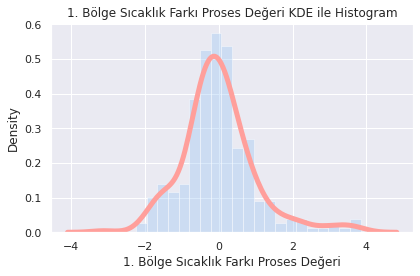

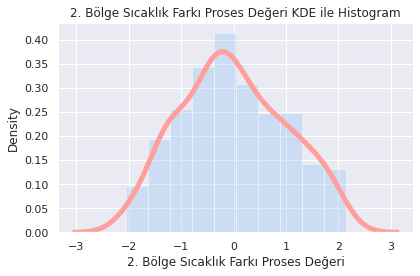

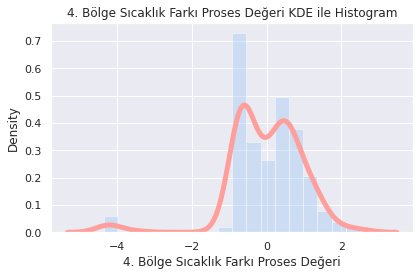

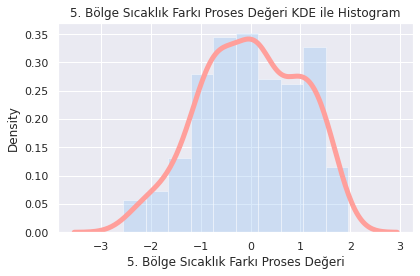

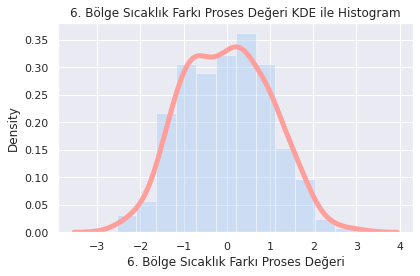

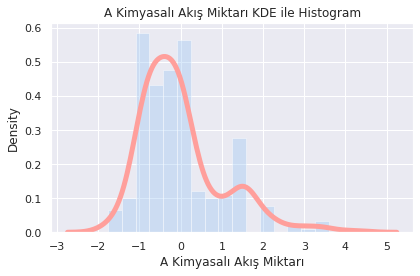

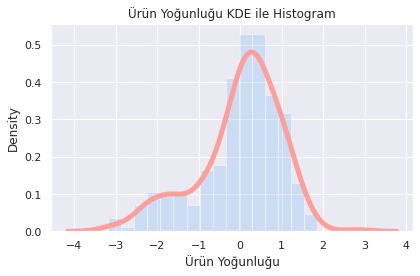

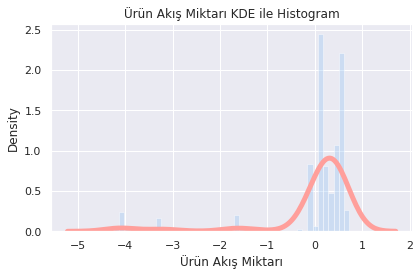

In [ ]:
for i in my_dict:
    quick_plot(X_train,i,my_dict[i])

Toplu halde çizdirilmiş olan histogram grafiklerinin her biri incelendiği zaman, dağılımlarının genel anlamda çarpık olduğu gözlemlenmektedir.

### 3g.2)Box Plot

In [ ]:
def quick_box(df = None, variable = None,labeled = None):
    plt.boxplot(x = variable, notch=True, vert = False,
    autorange=True,
    data = df)
    plt.yticks([1], ["{}".format(variable)])
    plt.title("{} Değişkenin Kutu Grafiği ".format(variable))
    plt.ylabel("{}".format(labeled))
    plt.show()

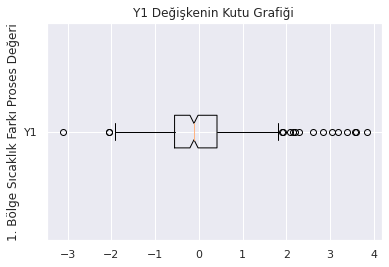

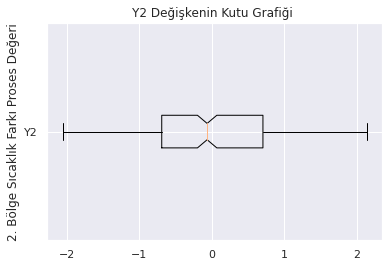

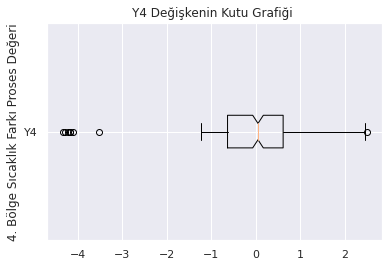

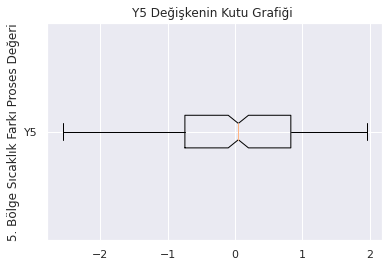

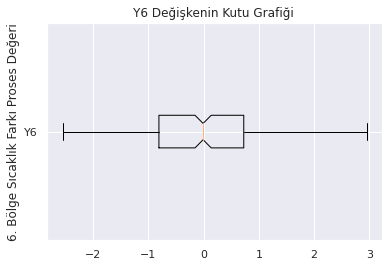

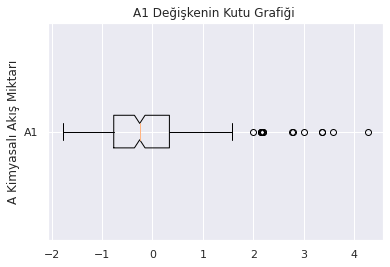

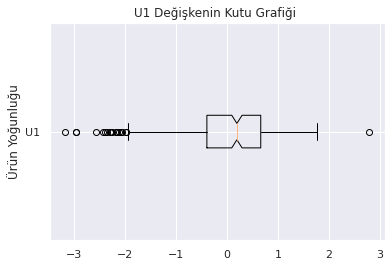

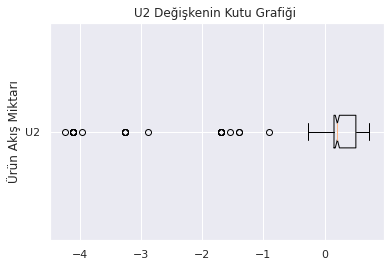

In [ ]:
for i in my_dict:
    quick_box(X_train,i,my_dict[i])

Box plot grafiklerine bakıldığında, aykırı gözlemlemlerden dolayı oluşan çarpıklık gözlemleniyor. 
Burada aykırı gözlemler, çok değişkenli olarak ele alındığında kullanılacak olan yöntem, "LocalOutlierFactor" yöntemi olacaktır.

"LocalOutlierFactor" yöntemi, belirtilen eşik değere göre, aykırı gözlemlerin bu değerlerle doldurulmasını sağlamaktır. Bu baskılama yöntemi kullanılarak veri kaybının önlenmesi amaçlanmaktadır. Bu fonksiyonda tahmin edici, sayısı ve yoğunluk  parametreleri tanımlanacaktır. 

"Contamination" veri setindeki aykırı değer olasılıklarını temsil etmektedir. Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerlerin tanımlanabilmesine imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılır. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur, yorumu yapılabilir. Dolayısıyla burada bir komşuluk yapısı söz konusudur. Bir değerin çevresi yoğun değil ise, bu değerin aykırı değer olduğu yönünde bir değerlendirme yapılır.

In [ ]:
print(f"1:{X_train.shape}")

1:(270, 10)


In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 16, contamination = "auto")

clf.fit_predict(X_train)

array([ 1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
df_scores = clf.negative_outlier_factor_

np.sort(df_scores)


array([-3.61835574, -2.65300183, -2.58861441, -2.58703927, -2.57213669,
       -2.53803063, -2.0577807 , -2.0360232 , -2.03077946, -2.02028529,
       -2.01303518, -1.98876125, -1.85212767, -1.8082936 , -1.7208316 ,
       -1.66786662, -1.66503487, -1.66355421, -1.62245433, -1.60487825,
       -1.59719625, -1.59047252, -1.5699916 , -1.56924291, -1.55773883,
       -1.5499796 , -1.52569679, -1.50762591, -1.50258238, -1.46701898,
       -1.45092128, -1.42968774, -1.41873201, -1.40652349, -1.40649882,
       -1.40148176, -1.40106793, -1.39246347, -1.38208319, -1.37526531,
       -1.36013788, -1.35886599, -1.356652  , -1.34796423, -1.34591776,
       -1.32556715, -1.3171774 , -1.31501568, -1.3128521 , -1.31175416,
       -1.30865211, -1.30464071, -1.3031339 , -1.30156932, -1.29422287,
       -1.29025613, -1.28731797, -1.28483742, -1.28390268, -1.28046412,
       -1.28010171, -1.27997094, -1.2799308 , -1.2771466 , -1.27544335,
       -1.26766333, -1.26751189, -1.26703681, -1.25803792, -1.25

In [ ]:
esik_deger = np.sort(df_scores)[42]

aykiri_tf = df_scores > esik_deger

aykiri_tf[:5]



array([ True,  True,  True,  True,  True])

In [ ]:
baski_deger = X_train[df_scores == esik_deger]

aykirilar = X_train[~aykiri_tf]

aykirilar



,Y1,Y2,A1,Y4,Y5,Y6,U1,U2,E1,E2
2014-06-06,0.109655,1.830446,3.577750,-0.283265,-1.013684,1.359822,-0.546513,0.151868,-0.536490,-0.313789
2014-11-19,0.351344,-0.315280,-0.235484,-3.522018,-0.890673,0.319079,1.665323,0.367618,-0.335027,-0.316645
2015-04-28,-0.467258,-0.579281,-0.506632,0.455346,0.775538,0.503864,-0.778159,-1.548167,-0.133563,-0.304374
2014-12-18,-0.949953,-0.959381,-0.831601,1.839123,-2.558791,-2.551484,0.836554,-4.238889,-0.491720,-0.251694
2015-07-08,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.791370,0.441007,-0.200717,-0.290199
2015-05-07,3.570452,0.943035,-1.756366,0.022419,-1.728228,0.239824,0.128961,0.156139,-0.223102,-0.332618
2014-11-21,0.199777,-0.193433,-0.279365,-4.228818,-0.725069,0.243081,1.417617,0.473572,-0.335027,-0.316645
2014-08-18,-3.110818,-1.364770,-1.765670,-1.242316,-0.174857,0.975922,2.796304,-2.888019,-0.200717,-0.370277
2015-03-20,-0.220107,-1.114946,-0.265315,0.547797,-0.175493,-1.264725,-0.282747,-1.694134,-0.581260,-0.267667
2015-05-24,1.466255,-0.445939,1.526942,0.426766,0.477705,0.034629,0.200499,-0.127286,2.194461,-0.238471


In [ ]:
aykirilar.to_records(index = False)
res = aykirilar.to_records(index = False)
res[:] = baski_deger.to_records(index = False)

In [ ]:
X_train[~aykiri_tf] = pd.DataFrame(res, index = X_train[~aykiri_tf].index)
X_train[~aykiri_tf].head()



,Y1,Y2,A1,Y4,Y5,Y6,U1,U2,E1,E2
2014-06-06,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199
2014-11-19,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199
2015-04-28,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199
2014-12-18,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199
2015-07-08,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199


In [ ]:
X_train.loc[X_train[~aykiri_tf].index,:].head()

,Y1,Y2,A1,Y4,Y5,Y6,U1,U2,E1,E2
2014-06-06,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199
2014-11-19,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199
2015-04-28,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199
2014-12-18,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199
2015-07-08,-0.145006,-1.050957,0.072366,1.194205,1.434457,-1.236497,-1.79137,0.441007,-0.200717,-0.290199


In [ ]:
X_train.head()

,Y1,Y2,A1,Y4,Y5,Y6,U1,U2,E1,E2
2015-04-14,-1.296784,-1.744870,-0.833142,1.272241,0.985642,-1.779342,-1.689173,-4.102804,-0.514105,-0.278034
2015-05-16,2.830364,0.152565,-0.513303,0.334564,-0.432322,0.108021,-0.263281,-0.132950,0.358904,0.459175
2014-07-23,0.087808,1.628518,0.059214,-0.628712,-0.926591,1.287080,0.013138,0.156837,-0.335027,-0.255396
2014-10-28,0.835405,0.703174,-0.890606,-0.604108,-0.883362,0.560754,1.351432,0.190447,0.269364,0.326416
2015-06-06,-0.307497,-0.878533,1.996574,1.218560,1.686200,-0.891030,-1.036572,-0.130183,-0.088793,-0.078419


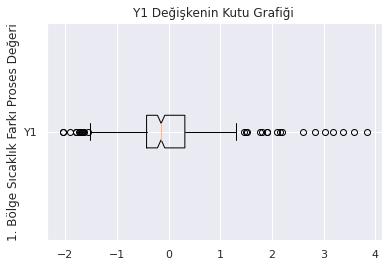

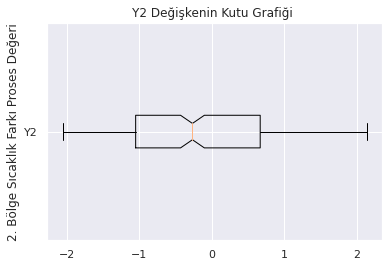

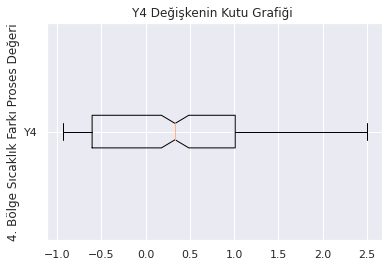

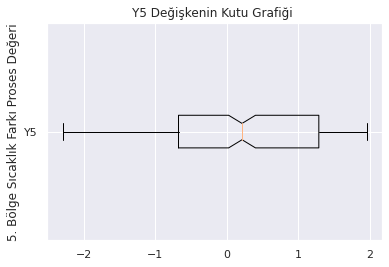

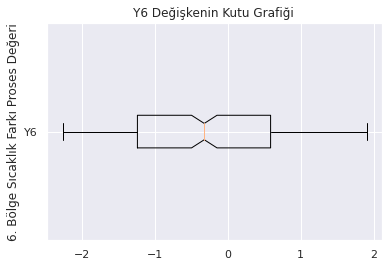

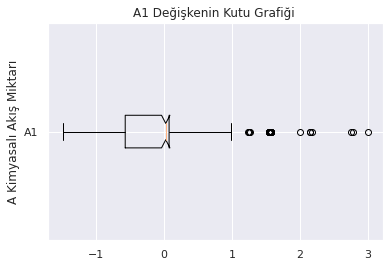

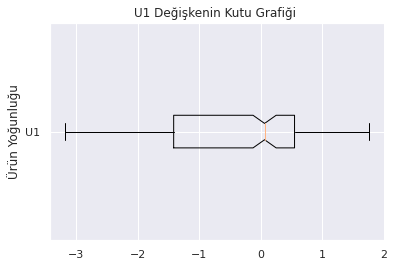

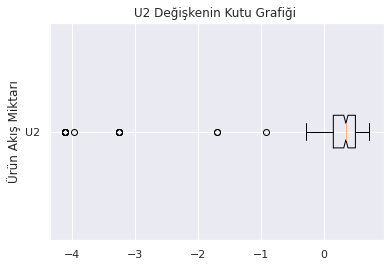

In [ ]:
for i in my_dict:
    quick_box(X_train,i,my_dict[i])

Küme sayısına göre aykırı değer olarak belirlenen eşik değerin indisinden, aşağıda kalan kısımların yerine minimum değerler ile doldurularak baskılama işlemi yapılmıştır. Küme sayısını optimalliği, küme sayısının artışıyla gruplaşmanın artması ve aykırı değerlerin azalmasından etkilendiği için 16 olarak belirlenen n_neighbors eşik değerin indisi 42.gözlem olacak şekilde seçilmiştir. 

# 4) Zaman Serisi ile Ön İşleme

Zaman serisi veri noktalarının sıklığını ifade etmektedir. Düzenli zaman aralıklarında (belirli bir periyoda sahiptirler) tipik olarak ölçülür.

## 4a) Zaman Grafiği

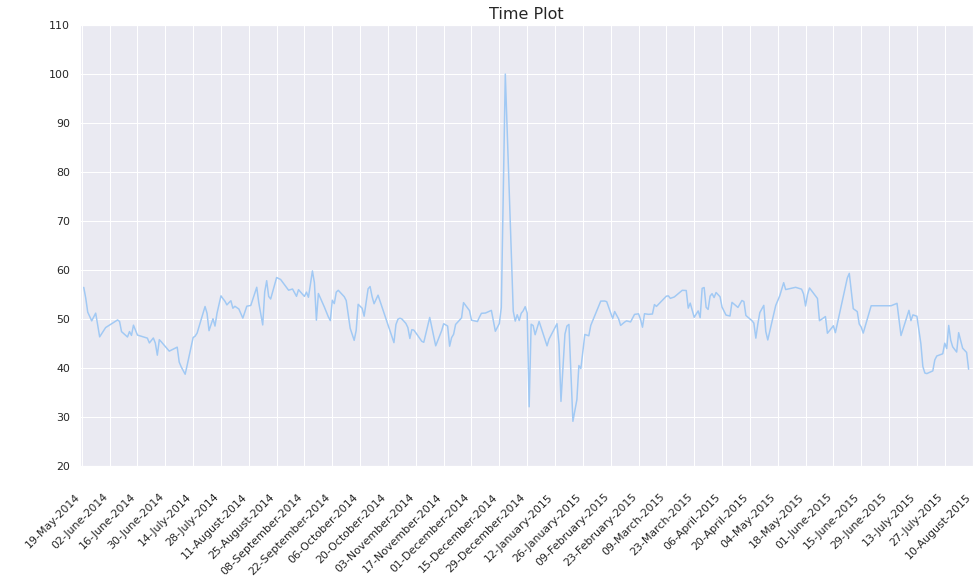

In [ ]:
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU, WeekdayLocator, DateFormatter

def time_plot(df, column_name, title):
    fig = plt.figure(figsize=(16, 9))

    ax = df[column_name].plot(xlim=['2014-05-18T00:00:00.000000','2015-08-10T00:00:00.000000'],ylim=[20,110])

    ax.set(xlabel='')
    ax.set_title(title, size=16)

    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=0, interval=2))
    ax.xaxis.set_major_formatter(DateFormatter("\n\n%d-%B-%Y"))

    plt.xticks(rotation='45');

time_plot(y_train, "D", "Time Plot")


Zaman grafiği zamana bağlı olarak değişkenin nasıl etkilendiğini göstermektedir. Bu grafik, zaman değişkeninin anlaşılması adına başlangıç noktası olarak kullanılmıştır.


## 4b) Gecikme Grafiği

In [ ]:
X_lag = y_train.copy()
X_lag['Lag'] = y_train['D'].shift(1)
X_lag = X_lag.reindex(columns=['D', 'Lag'])

X_lag.head()

,D,Lag
2015-02-11,51.504,NaN
2015-02-21,50.923,51.504
2014-11-17,49.013,50.923
2015-03-02,50.998,49.013
2014-06-22,45.087,50.998


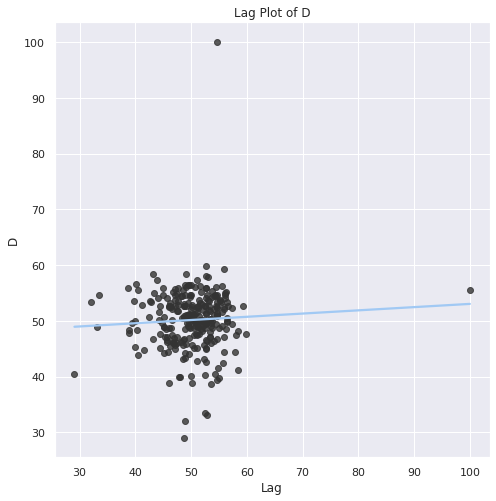

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.regplot(x='Lag', y='D', data=X_lag, ci=None, scatter_kws=dict(color='0.20'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of D');

Gecikme grafiği verilen zaman serisinin rastgele değerlerden oluşup oluşmadığının anlaşılmasına yardımcı olur. Değerler rastgele olsaydı, gözle görülür bir düzen oluşmazdı. Fakat yukarıda elde edilen Gecikme Grafiği'nde, verilerin belirli bir "pattern" oluşturduğu gözlemleniyor.Böylece, ölçülen değerlerin bir önceki günün değerleriyle ilişkili olduğu söylenebilir.Bu ilişkinin çok güçlü olduğu söylenemez

Zaman serisi grafiğine bakıldığı zaman, X-Ekseninde  Verilerin Ölçüm Zamanını, Y-Ekseninde ise o değişkenlere ait Gözlem/Ölçüm değerlerini gözlemleyebilirsinz. Zamana bağlı aksiyom alabilirsiniz. Bir verinin ne zaman trende sahip olduğu ne zaman artış gösterdiğini veya zaman içerisindeki dalgalanmaları graiğe bakarak çok rahat yorumlayabilirsiniz.

## 4c) Tüm Değişkenlerin Zaman Grafiği

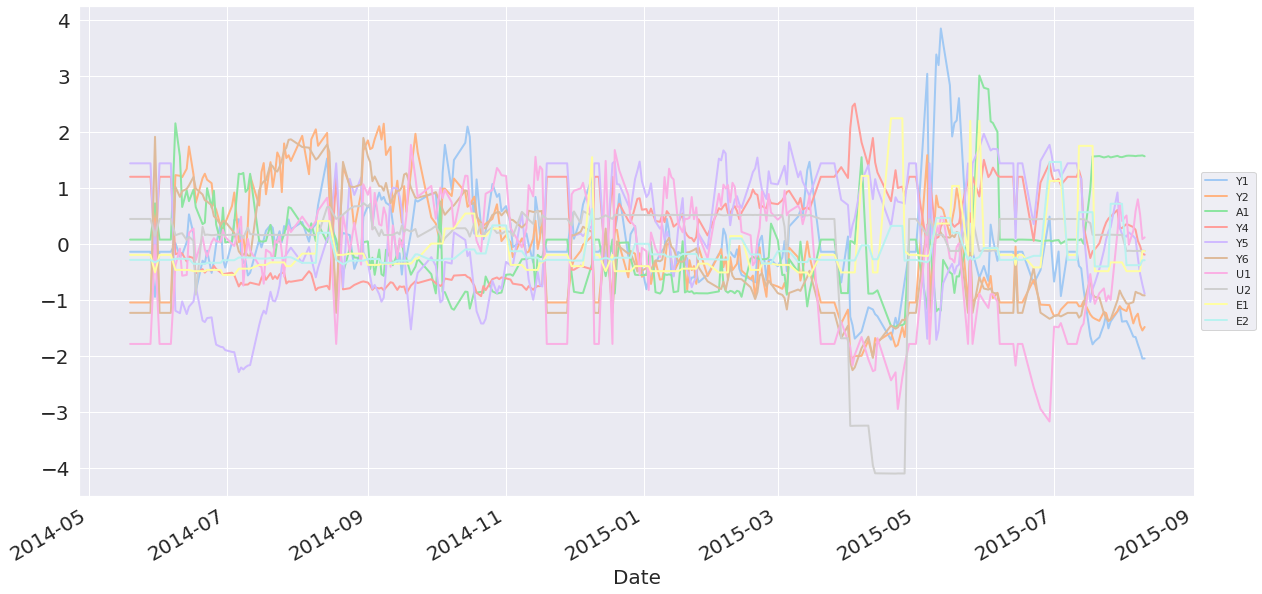

In [ ]:
ax = X_train.plot(figsize= (20,10), linewidth=2, fontsize = 20)
plt.xlabel("Date", fontsize=20)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

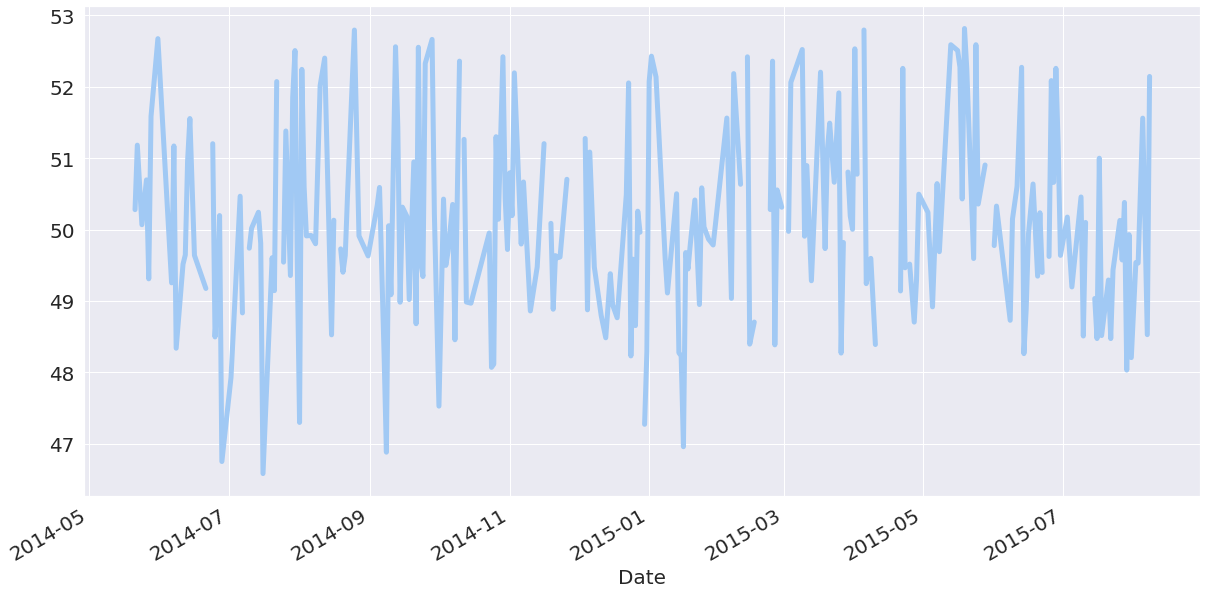

In [ ]:
d = y_train['D']
d.rolling(24).mean().plot(figsize= (20,10), linewidth=5, fontsize = 20)
plt.xlabel("Date", fontsize=20);

Dönüşüm oranı periyot 24 olarak ele alındığında hareketli ortalama değerli grafiği hakkında yaz ayından sonbahara doğru olan mevsimsel geçiş döneminde hızlı bir artış gözlemendikten sonra kış aylarına doğru beliren düşüşten tekrardan bahara doğru bir yükseliş gözlemlenmiştir. Bu mevsimlerde teknik olarak inceleme sıklığı arttırılabilir ve ya cihaz bakımları gerçekleştirebilir. 

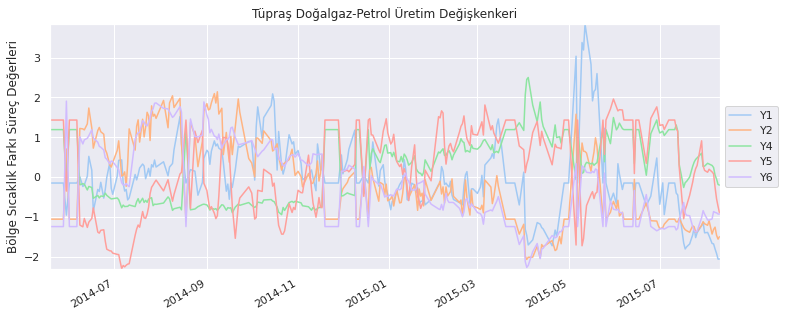

In [ ]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Bölge Sıcaklık Farkı Süreç Değerleri'
xlabel=''

ax = X_train['Y1'].plot(figsize=(12,5),title=title,legend=True)
ax = X_train['Y2'].plot(figsize=(12,5),title=title,legend=True)
ax = X_train['Y4'].plot(figsize=(12,5),title=title,legend=True)
ax = X_train['Y5'].plot(figsize=(12,5),title=title,legend=True)
ax = X_train['Y6'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


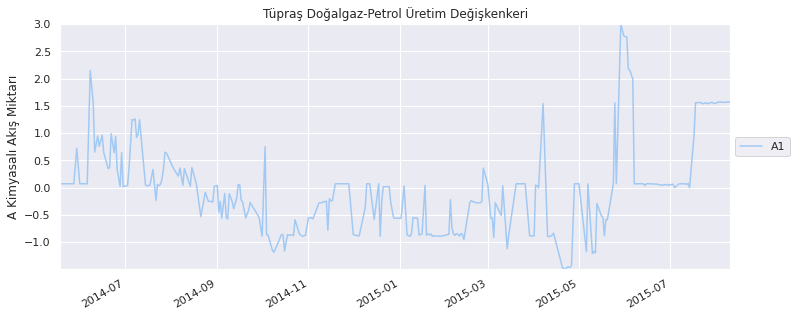

In [ ]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='A Kimyasalı Akış Miktarı'

xlabel=''


ax = X_train['A1'].plot(figsize=(12,5),title=title,legend=True)

ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

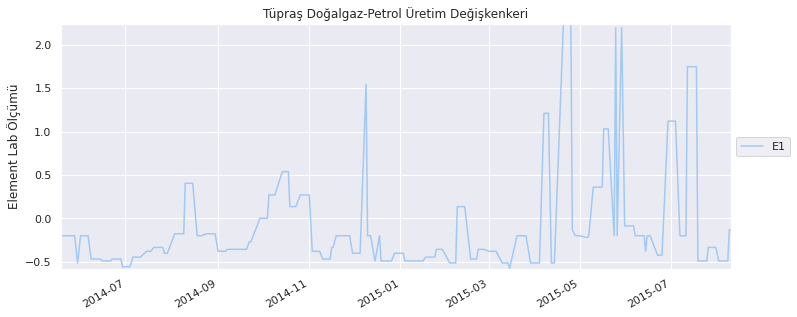

In [ ]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Element Lab Ölçümü'
xlabel=''
ax = X_train['E1'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

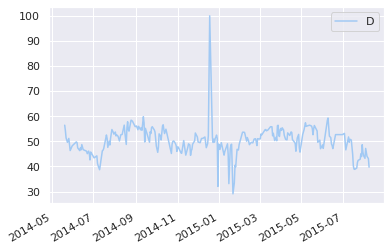

In [ ]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Bölge Sıcaklık Farkı Süreç Değerleri'
xlabel=''
y_train['D'].plot(legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

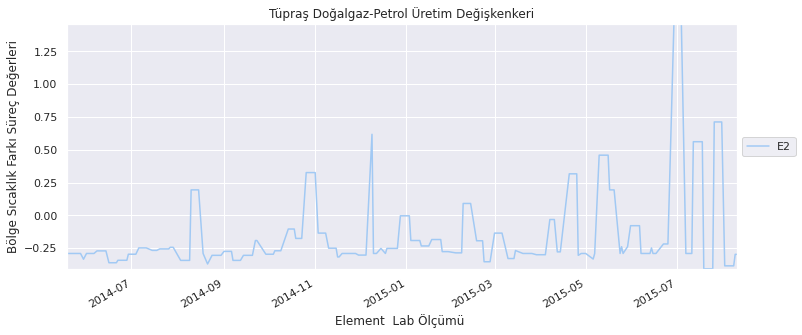

In [ ]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Bölge Sıcaklık Farkı Süreç Değerleri'
xlabel='Element  Lab Ölçümü '
ax = X_train['E2'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

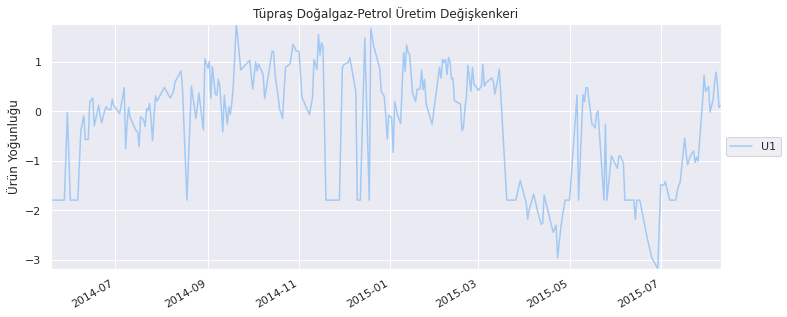

In [ ]:
title = 'Tüpraş Doğalgaz-Petrol Üretim Değişkenkeri'
ylabel='Ürün Yoğunluğu'
xlabel=''
ax = X_train['U1'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

# 5) Tahmine Dayalı Modelleme

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_df = scaler.fit_transform(merged_ffill)
standardized_df = pd.DataFrame(standardized_df, columns=merged_ffill.columns)
standardized_df.head()

,Y1,Y2,A1,Y3,Y4,Y5,Y6,U1,U2,O1,O2,D,E1,E2
0,-0.751771,1.557803,1.997953,-0.632899,0.140851,0.999466,2.801119,-0.073060,0.176910,-0.081802,0.064032,1.081649,-0.528943,-0.327777
1,-0.649610,1.382520,2.003726,-0.770530,-0.096782,0.501004,2.762718,0.206308,0.195896,1.962568,-0.208131,1.081649,-0.528943,-0.327777
2,-0.553620,1.610351,2.003279,-0.618037,-0.001779,0.377098,2.761075,0.394299,0.179075,-0.763001,-0.507549,1.081649,-0.528943,-0.327777
3,0.111455,-0.043764,2.391270,-0.868031,-0.126455,-0.190726,2.502529,0.848807,0.180919,-1.444200,-0.123848,0.703905,-0.528943,-0.327777
4,0.106656,0.655866,1.994258,-0.159069,0.032881,1.073557,1.859553,0.504237,0.178064,-0.763001,-0.112528,0.211285,-0.528943,-0.327777


In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed(10)
standardized_df = standardized_df.sample(frac = 1)


y = pd.DataFrame(standardized_df['D'], columns = ['D'])
x = standardized_df.drop(columns = ['D','O1','O2','Y3'])
X_train = x.iloc[: int((len(x) * 80) / 100)]
X_test = x.iloc[int((len(x) * 80) / 100): ]
y_train = y.iloc[: int((len(x) * 80) / 100)]
y_test = y.iloc[int((len(x) * 80) / 100): ]


## - Lineer Regresyon Modeli



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = pd.DataFrame(lr.predict(X_test), columns= ['D'])
errorLinear = mse(y_test, y_pred)
print('Error for Validation Set in Linear Regressor:', errorLinear)
print('Accuracy for Validation Set in Linear Regressor:', 1-errorLinear)


Error for Validation Set in Linear Regressor: 0.373754975091961
Accuracy for Validation Set in Linear Regressor: 0.626245024908039


## Polynomial Regresyon

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(
    degree = 2, 
    include_bias = False, interaction_only = True)
interaction_x = interaction.fit_transform(X_train)
interaction = PolynomialFeatures(
    degree = 2, 
    include_bias = False, interaction_only = True)
interaction_test = interaction.fit_transform(X_test)
lr = LinearRegression()
lr.fit(interaction_x, y_train)
y_pred = pd.DataFrame(lr.predict(interaction_test), columns= ['D'])
errorLinear = mse(y_test, y_pred)
print('Error for Validation Set in Polynomial Regressor:', errorLinear)
print('Accuracy for Validation Set in Polynomial Regressor:', 1-errorLinear)

Error for Validation Set in Polynomial Regressor: 0.3425915722264589
Accuracy for Validation Set in Polynomial Regressor: 0.657408427773541


## - KNN Regresyon Modeli

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN
regressor = KNN(n_neighbors=54, metric= 'euclidean')
regressor.fit(X_train, y_train)
valid_predict = pd.DataFrame(regressor.predict(X_test), columns= ['D'])
errorKNN = mse(y_test, valid_predict)
print("Error for Validation Set in kNN Regressor: ", errorKNN)
print("Accuracy for Validation Set in kNN Regressor: ", 1 - errorKNN)

Error for Validation Set in kNN Regressor:  0.34027337146086445
Accuracy for Validation Set in kNN Regressor:  0.6597266285391356


## - Ridge Regresyon Modeli

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, max_iter=10000)
clf.fit(X_train, y_train)
y_pred = pd.DataFrame(clf.predict(X_test), columns= ['D'])
errorRidge = mse(y_test, y_pred)
print('Error for Validation Set in Ridge Regressor:', errorRidge)
print('Accuracy for Validation Set in Ridge Regressor:', 1-errorRidge)

Error for Validation Set in Ridge Regressor: 0.37208183831229985
Accuracy for Validation Set in Ridge Regressor: 0.6279181616877001


## - SVM Regresyon Modeli 

In [ ]:
from sklearn import svm
regressor = svm.SVR()
regressor.fit(X_train, y_train)
valid_predict = pd.DataFrame(regressor.predict(X_test), columns= ['D'])
error = mse(y_test, valid_predict)
print("Error for Validation Set in Regressor: ", error)
print("Accuracy for Validation Set in Regressor: ", 1 - error)

Error for Validation Set in Regressor:  0.24039747815905319
Accuracy for Validation Set in Regressor:  0.7596025218409468


## - GridSearch Regresyon Modeli

In [ ]:
from sklearn.model_selection import GridSearchCV
svr_model = svm.SVR()
svr_params = {"C": [0.1, 0.5, 1,3]}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=5).fit(X_train, y_train)
valid_predict = pd.DataFrame(svr_cv_model.predict(X_test), columns= ['D'])
error = mse(y_test, valid_predict)
print("Error for Validation Set in Regressor: ", error)
print("Accuracy for Validation Set in Regressor: ", 1 - error)

Error for Validation Set in Regressor:  0.23234536453539636
Accuracy for Validation Set in Regressor:  0.7676546354646037


## - MLP Regresyon Modeli(Yapay Sinir Ağları)

In [ ]:
mlp_model = MLPRegressor().fit(X_train, y_train)
mlp_model.predict(X_test)
y_pred = mlp_model.predict(X_test)
error = mse(y_test, y_pred)
print("Error for Validation Set in Regressor: ", error)
print("Accuracy for Validation Set in Regressor: ", 1 - error)

Error for Validation Set in Regressor:  0.24234602693755475
Accuracy for Validation Set in Regressor:  0.7576539730624452


## - Karar Ağacı Regresyon Modeli

In [ ]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
error = mse(y_test, y_pred)
print("Error for Validation Set in Regressor: ", error)
print("Accuracy for Validation Set in Regressor: ", 1 - error)

Error for Validation Set in Regressor:  0.3962984918212797
Accuracy for Validation Set in Regressor:  0.6037015081787203


## - Random Forest Regresyon Modeli

In [ ]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2,10,80,100]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
rf_cv_model.best_params_
rf_model = RandomForestRegressor(random_state = 42, 
                                 max_depth = 8,
                                max_features = 2,
                                min_samples_split = 2,
                                 n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
error = mse(y_test, y_pred)
print("Error for Validation Set in Regressor: ", error)
print("Accuracy for Validation Set in Regressor: ", 1 - error)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Error for Validation Set in Regressor:  0.23401926432022266
Accuracy for Validation Set in Regressor:  0.7659807356797773


Daha iyi bir öngörü yapmak amacıyla, eğitilen modeller yukarıda ardışık olarak çalıştırılmıştır. Bu algoritmalar, doğrusal ve doğrusal olmayan regresyon modelleri olarak adlandırılmıştır. Uygulandığında görüldüğü üzere en yüksek doğruluk oranı doğrusal olmayan Random Forest algoritmasına aittir. Bu sebeple, tahmin sürecinde bu algoritma kullanılacaktır.

In [ ]:
y_pred.shape

(90,)

In [ ]:
y_test.shape

(90, 1)

# 6) Model Değerlendirme, Öngörü ve Görselleştirmeleri

In [ ]:
X_pred.isnull().sum()

Y1     0
Y2     0
A1     0
Y4     0
Y5     0
Y6     0
U1     0
U2     0
E1    10
E2     3
dtype: int64

In [ ]:
X_pred = X_pred.interpolate()
X_pred.isnull().sum()

Y1    0
Y2    0
A1    0
Y4    0
Y5    0
Y6    0
U1    0
U2    0
E1    0
E2    0
dtype: int64

In [ ]:
rf_predict = rf_tuned.predict(X_pred)

In [ ]:
rf_predict = pd.DataFrame(rf_predict, columns=["D_pred"])

In [ ]:
X_pred = pd.merge(rf_predict, X_pred, left_index = True, right_index = True)

In [ ]:
X_pred.head()

,D_pred,Y1,Y2,A1,Y4,Y5,Y6,U1,U2,E1,E2


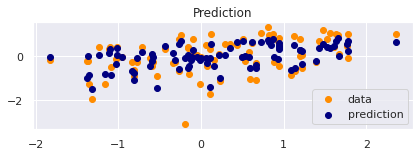

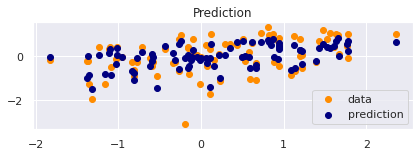

In [ ]:
X_graph = pd.DataFrame(X_test.Y2)

for i, weights in enumerate(["uniform", "distance"]):
    
    plt.figsize=(30,30)
    plt.subplot(2, 1, i + 1)
    plt.scatter(X_graph, y_test, color="darkorange", label="data")
    plt.scatter(X_graph ,pd.DataFrame(y_pred, columns=["D_pred"]), color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("Prediction")
    plt.tight_layout()
    plt.show()


Yukarıda oluşturulan grafikler incelendiğinde, elde edilen tahmin değerlerinin çoğunlukla "Train-Test" veri setinde verilen "D" değişkenleri ile eşleştiğini, ya da bu noktalara yakın değerlerden oluştuğu gözlemleniyor. Bunun sonucunda, yapılmış olan tahminin başarılı olduğu gözler önüne seriliyor.

In [ ]:
VAR = np.var(y_pred)
SSE = np.mean(np.mean(y_pred - y_test.values)**2)
BIAS = SSE - VAR

In [ ]:
print(f"\nTahmin Varyans:{VAR}\nHata Kareler Toplamı:{SSE}\nYan:{BIAS}")


Tahmin Varyans:0.29108322111292
Hata Kareler Toplamı:0.0019880301740825253
Yan:-0.2890951909388375


Düşük yan bize modelin uyumunu tahmin performansının test setinde ne kadar iyi olduğunu anlatmaktadır. 